# [Transformer](https://tutorials.pytorch.kr/beginner/transformer_tutorial.html)
Pytorch에서는 `nn.TransformerEncoder`을 이용한 단일 컴포넌트를 이용하여 쉽게 Transformer 모델링을 할 수 있습니다.

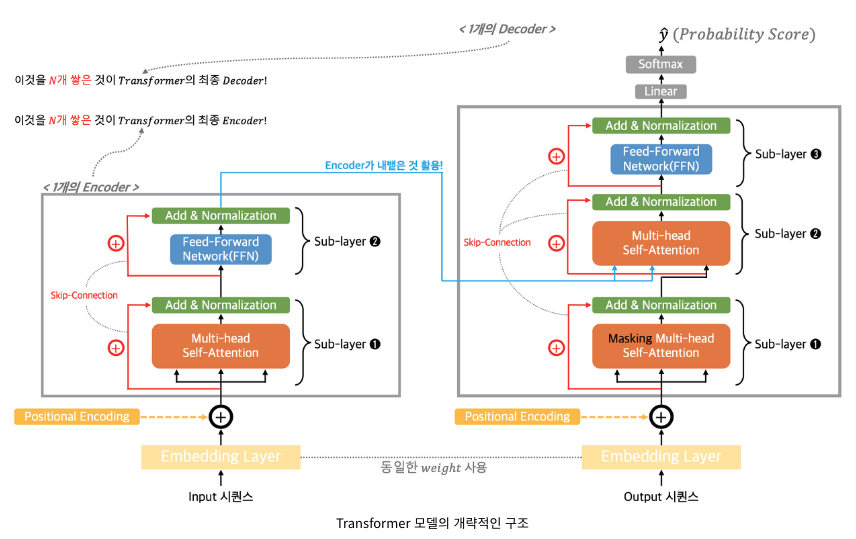

## [Transformer와 Seq2Seq의 차이점](https://gaussian37.github.io/dl-concept-transformer/)

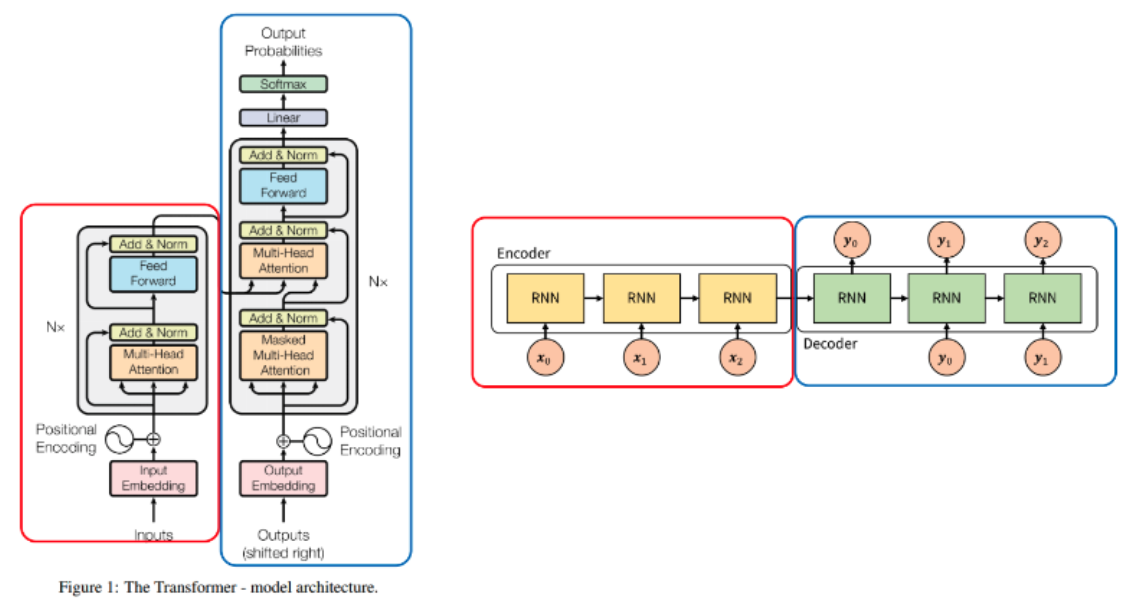

비슷한 점   
- `Seq2Seq`의 경우 Encoder(빨간색)와 Decoder(파란색) 형태로 이루어져 있고, 각 Encoder, Decoder에는 RNN을 사용하였습니다. 그리고 Encoder에서 Decoder로 정보를 전달할 때, 가운데 화살표인 context vector에 Encoder의 모든 정보를 저장하여 Decoder로 전달합니다.
- `Transformer`의 경우에도 Encoder(빨간색)와 Decoder(파란색) 형태가 있고 Encoder 끝단 부분에 Decoder로 전달되는 화살표가 있어서 Seq2Seq와 유사한 구조를 가집니다.
  
차이점 
- 가장 큰 차이점은 `Seq2Seq`에서는 Encoder 연산이 끝난 후에 Decoder 연산이 시작된다면, `Transformer`는 Encoder와 Decoder가 같이 연산이 일어난다는 차이점이 있습니다. 
- `Seq2Seq`에서는 Attention을 이용하기 때문에 RNN을 사용한다면, `Transformer`는 Self-Attention을 사용하기 때문에 RNN을 사용하지 않습니다.

## Transformer 구조

### Input, Output

- 입력
  - 각 단어는 One-hot Encoding 형태의 백터로 나타내어 집니다. 따라서 열벡터가 한 단어에 해당하며 열 벡터의 길이 즉, 행렬에서 행의 크기는 입력 단어의 가짓수와 관련이 있습니다.
  - 반면 열의 길이는 사용되는 sequence한 단어의 길이입니다. 문장에서 단어가 10개 있다면 행렬에서의 열 크기는 10이 된다고 볼 수 있습니다.

- 출력: 입력과 다르게 출력은 2가지의 Output이 표시되어 있습니다.
  - 위쪽에 있는 Output은 Transformer 모델을 통해 출력되는 실제 출력이고 아래쪽에 있는 Output은 Trnasformer에서 만들어낸 Output을 다시 입력으로 사용되는 것을 나타냅니다.
  - 다시 입력되는 Output의 첫 열벡터는 `<sos>`가 되고 X 표시가 되어있는 마지막 열벡터는 `<eos>`이므로 큰 의미는 없는 벡터입니다.
  - 따라서 shifted right라고 적힌 부분은 Output에서 하나씩 오른쪽으로 밀려서 다시 입력으로 들어가는 구조로 이해하시면 됩니다. 

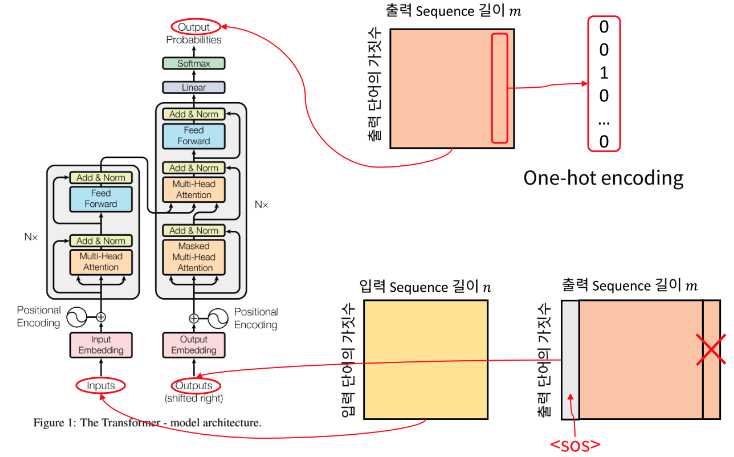

### Word Embedding

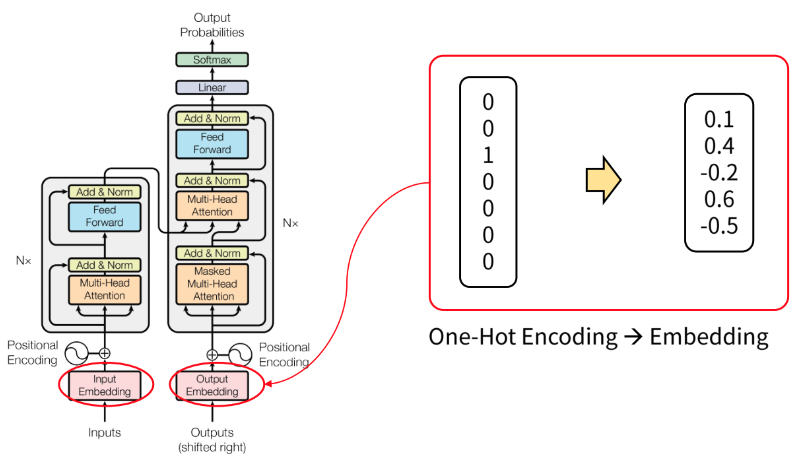

- 위 그림과 같이 one-hot encoding 벡터를 실수 형태로 변경하면 차원의 수를 줄일 수 있습니다.
- embedding의 경우 0을 기준으로 분포된 형태로 표현됩니다.

### [Positional Encoding](https://heekangpark.github.io/ml-shorts/positional-encoding-vs-positional-embedding)

#### RNN 제거

시퀀스 형태의 데이터는 각 항목의 값 뿐만 아니라 그 순서도 중요하다. "John loves Sarah"와 "Sarah loves John"은 단어는 모두 같지만 순서가 달라 의미가 다르다. 즉 시퀀스 형태의 데이터를 다루기 위해서는 순서 정보를 처리할 수 있는 모델을 사용해야 한다. RNN은 연속적으로 입력을 받아들이고 은닉 상태를 업데이트하기 때문에 시퀀스 형태의 데이터를 처리하기에 적합하다.    
  
하지만 RNN은 단점이 많은 구조이다.  
- 병렬화 문제: RNN은 그 구조상 순차적으로 입력을 처리해야 하기에 병렬화가 불가능하다. 이 때문에 대규모의 데이터셋을 이용한 학습이 불가능하다.(학습 시간이 너무 길어진다.)
- Long Distance Dependency 문제: 시퀀스에서 멀리 떨어진 항목들 간의 관계성은 `gradient vanishing/exploding` 문제로 학습이 잘 되지 않는다.

#### Positional Encoding 설명

RNN 구조에서는 순서 정보가 자연스럽게 모델에 입력됐지만, 어턴션 연산에서는 순서 정보가 고려되지 않는다. 그래서 트랜스포머 모델에서는 모델에 입력되는 입력 임베딩(input embedding)에 positional encoding이라 불리는, 입력 임베딩과 같은 차원의 위치 정보를 담고 있는 벡터를 더해준다.

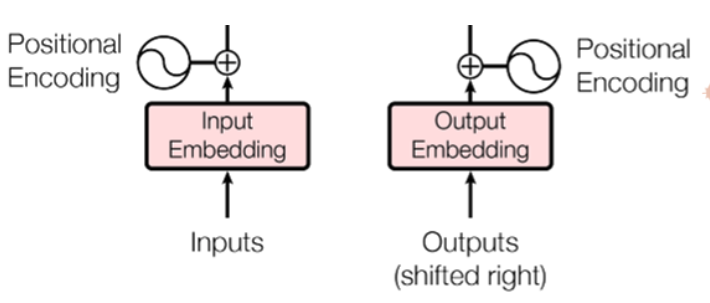

입력 임베딩의 차원이 $d$라 할 때, $p$번째 단어(token)의 positional encoding은 다음 식을 이용해 계산된다.  

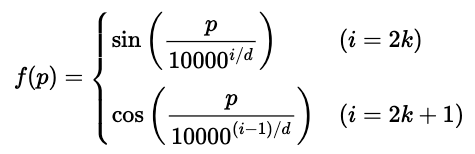

### Multi-Head Attention

Multi-Head Attention은 `Scaled Dot-Product Attention`을 `h`개 모아서 Attention layer를 병렬적으로 사용하는 것을 말합니다.    
  
즉, 한번에 전체 Scaled Dot-Product Attention을 연산하기 보다 여러 개의 작은 Scaled Dot-Product Attention으로 분할하고 병렬적으로 연산한 다음에 다시 concat하여 합치는 divide & conquer 전략이라고 생각할 수 있습니다.

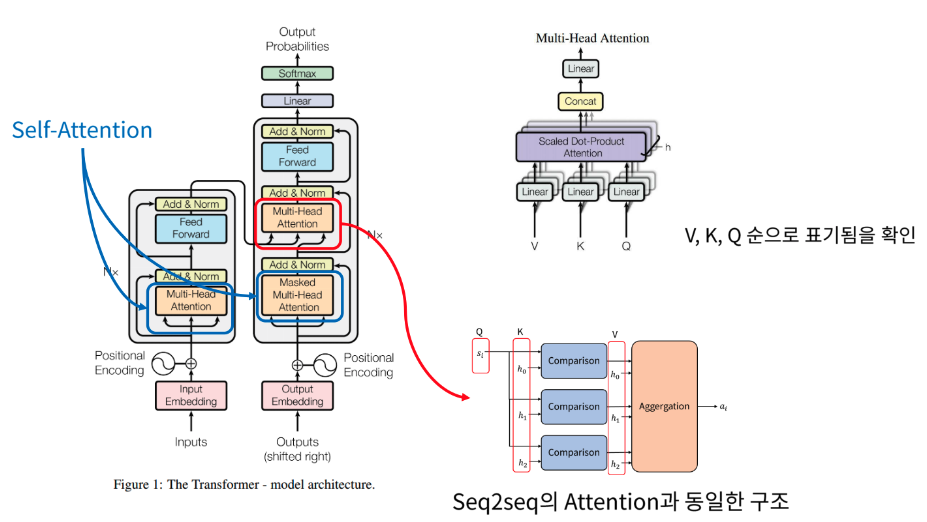

#### [Self-Attention](https://techblog-history-younghunjo1.tistory.com/496)

`Transformer 모델`은 일반 `Attention`이 아닌 `Self-Attention` 기법을 사용합니다.

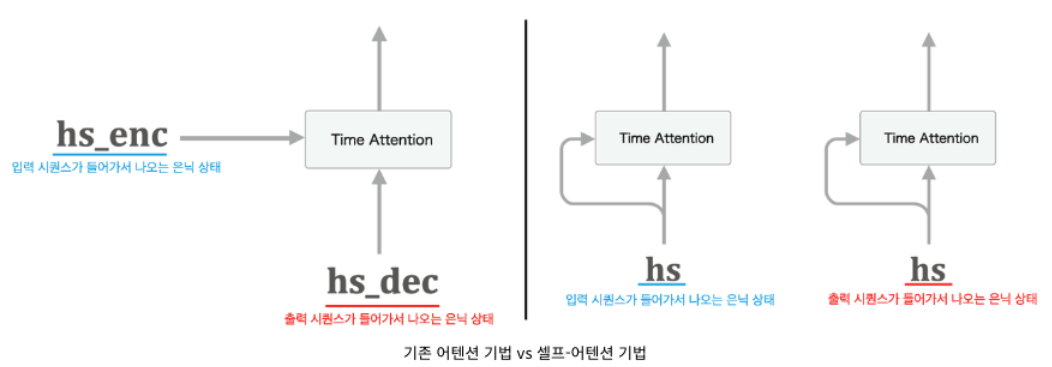

위의 이미지와 같이 기존 `Attention` 기법은 입력-출력 간에 대응되는 단어 관계를 파악하는 게 핵심이었다. 하지만 `Self-Attention` 기법은 입력, 출력 각 시퀀스 내부의 단어들 간의 대응 관계를 파악하는 것이 핵심이다. 아래 이미지처럼 기법의 차이가 난다. 

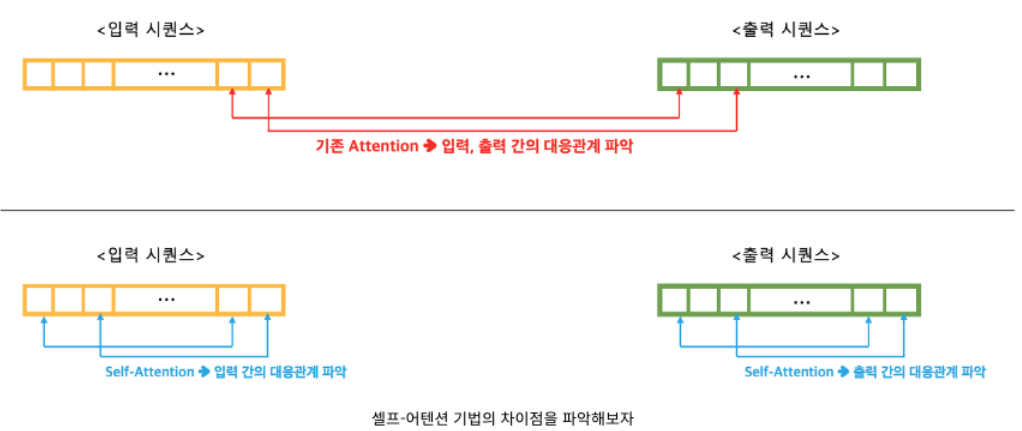

`Self-Attention` 기법은 입력 시퀀스 내에서의 대응관계를 학습하고 동시에 출력 시퀀스 내에서의 대응관계도 학습하는 방법이다.     
그리고 이러한 `Self-Attention` 기법을 사용해 만든 계층을 재귀적으로 쌓아서 기존 Seq2Seq2 모델의 RNN이 하던 (과거의 기억을 유지하는) 메모리 네트워크 역할을 대체하기도 한다.  

#### Scaled Dot-Product Attention

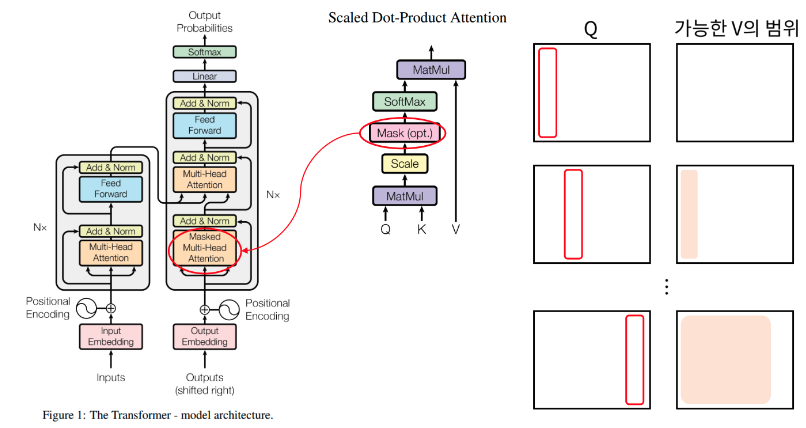

- Attention에서 사용되는 입력은 `Query, Key, Value`입니다. 따라서 Scaled Dot-Product Attention에서도 Query, Key, Value 구조를 띕니다. 
- Q와 K의 비교 함수는 `Dot-Product`와 `Scale`로 이루어 집니다. Dot-Product는 위 그림에서 `MatMul`에 해당하고 간단히 Inner Product(내적)과 같습니다.  
- 그리고 Mask를 이용해 illegal connection의 attention을 금지합니다.
  - 위 그림에서 오른쪽 `Q`와 `가능한 V의 범위`를 살펴보면 선택된 `Q`에 대하여 `가능한 V의 범위`는 위치상 `Q`의 바로 앞까지임을 알 수 있습니다.  
  - 정리하면 Self-Attention에서는 자기 자신을 포함한 미래의 값과는 Attention을 구하지 않기 때문에 Masking을 사용합니다.

### Position-wise Feed-Forward Network(FFN)

Position wise Feed Forward는 단어의 Position 별로 Feed Forward 한다는 뜻입니다. 각 단어에 해당하는 열 벡터가 입력으로 들어갔을 때, `FC Layer -> Relu -> FC Layer` 연산을 거치게 됩니다.

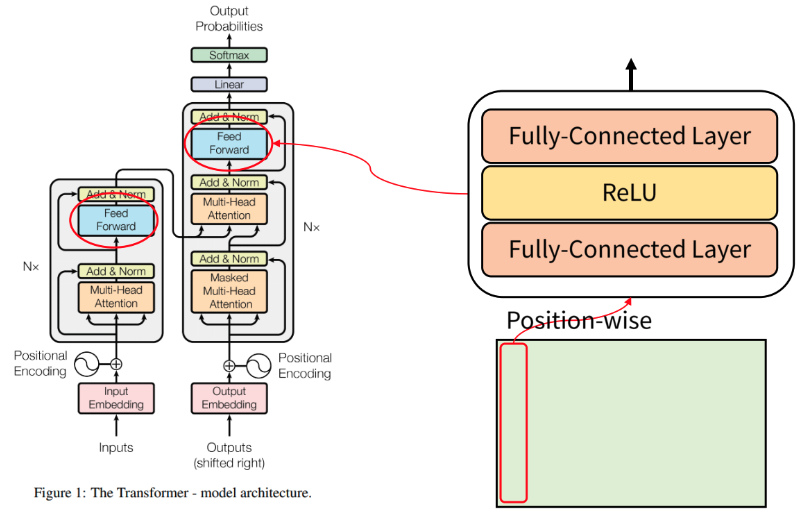

### Add, Norm

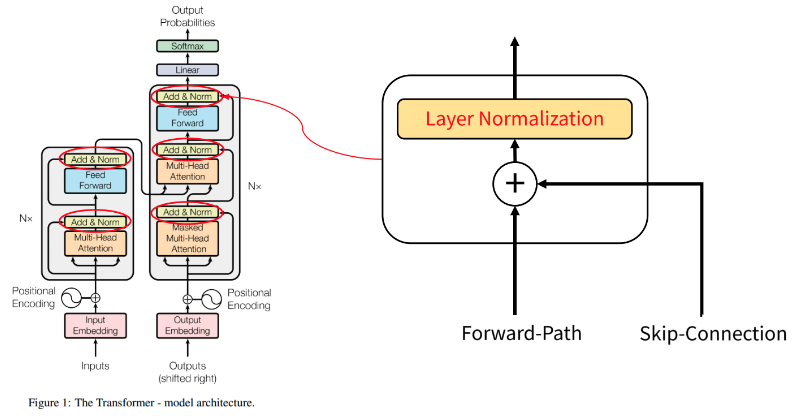

- [Skip Connection](https://techblog-history-younghunjo1.tistory.com/279)
  - Add는 Skip(Residual) Connection을 의미한다.  
  - Skip Connection을 사용하는 이유는 '덧셈' 연산의 역전파 시 기울기를 건드리지 않고 그대로 흘려보내는 특성 때문에 `기울기 소실, 폭발 문제를 막을 수 있기 때문이다.`
- Norm(Normalization)
  - 출력값들의 분포를 인위적으로 표준정규분포 형태로 만들어 주는 것이다.

### Output Softmax

- 마지막 Feed Forward를 통해 출력이 되면 Linear 연산을 통하여 출력 단어 종류 갯수로 출력 사이즈를 맞춰 줍니다.  
- 최종적으로 Softmax를 이용해 어떤 단어인지 Classification 문제를 해결할 수 있습니다.

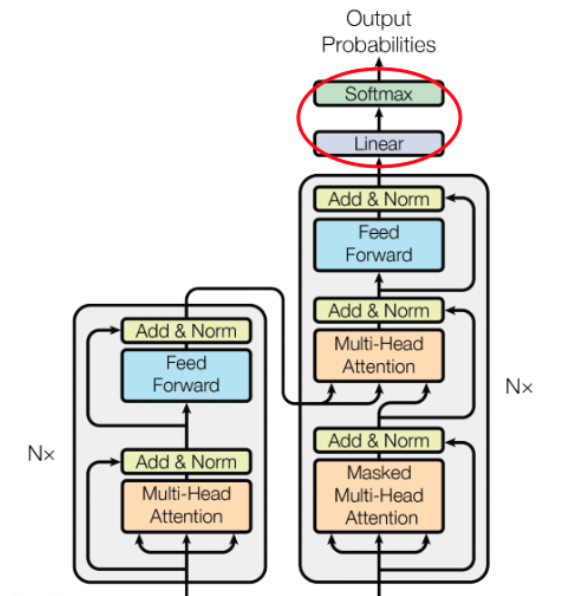

# 1.모델 정의하기

In [1]:
import math
from typing import Tuple

import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

`PositionalEncoding` 모듈은 시퀀스 안에서 토큰의 상대적인 또는 절대적인 포지션에 대한 어떤 정보를 주입합니다. 포지셔널 인코딩은 임베딩과 합칠 수 있도록 똑같은 차원을 가집니다. 여기에서, 우리는 다른 주파수(frequency)의 `sine`과 `cosine` 함수를 사용합니다.

In [2]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

`nn.TransformerEncoder` 는 여러 개의 `nn.TransformerEncoderLayer` 레이어로 구성되어 있습니다.     
`nn.TransformerEncoder` 내부의 `self-attention` 레이어들은 시퀀스 안에서의 이전 포지션에만 집중하도록 허용되기 때문에, 입력(input) 순서와 함께, 정사각 형태의 어텐션 마스크(attention mask) 가 필요합니다.       
언어 모델링 과제를 위해서, 미래의 포지션에 있는 모든 토큰들은 마스킹 되어야(가려져야) 합니다. 실제 단어를 얻기 위해서, `nn.TransformerEncoder` 의 출력은 로그-소프트맥스(log-Softmax) 로 이어지는 최종 선형(Linear) 레이어로 전달 됩니다.

In [3]:
class TransformerModel(nn.Module):

    def __init__(self, ntoken: int, d_model: int, nhead: int, d_hid: int,
                nlayers: int, dropout: float = 0.5):
        super().__init__()
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, d_model)
        self.d_model = d_model
        self.decoder = nn.Linear(d_model, ntoken)

        self.init_weights()

    def init_weights(self) -> None:
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src: Tensor, src_mask: Tensor) -> Tensor:
        """
        Args:
            src: Tensor, shape [seq_len, batch_size]
            src_mask: Tensor, shape [seq_len, seq_len]

        Returns:
            output Tensor of shape [seq_len, batch_size, ntoken]
        """
        src = self.encoder(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output


def generate_square_subsequent_mask(sz: int) -> Tensor:
    """Generates an upper-triangular matrix of -inf, with zeros on diag."""
    return torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)

# 2.데이터 로드하고 배치 만들기

어휘(vocab) 객체는 훈련 데이터셋(train dataset)에 의하여 만들어지고, 토큰(token)을 텐서(tensor)로 수치화하는데 사용됩니다.    
Wikitext2에서 보기 드믄 토큰(rare token)은 `<unk>`로 표현됩니다.     
  
주어진 1D 벡터의 시퀀스 데이터에서, `batchify()` 함수는 데이터를 `batch_size` 컬럼들로 정렬합니다. 만약 데이터가 `batch_size` 컬럼으로 나누어 떨어지지 않으면, 데이터를 잘라내서 맞춥니다.    
예를 들어 (총 길이 26의) 알파벳을 데이터로 보고 `batch_size=4` 일 때, 알파벳은 길이가 6인 4개의 시퀀스로 나눠집니다.

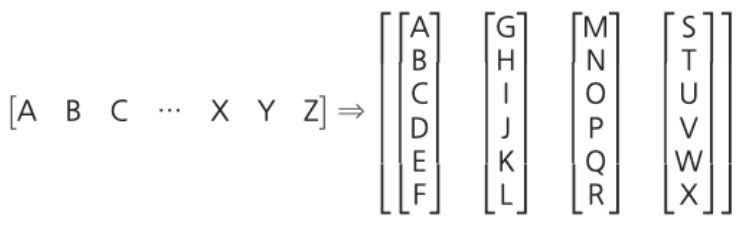

배치 작업은 더 많은 병렬 처리를 가능하게 하지만, 모델이 독립적으로 각 컬럼들을 취급해야 함을 뜻합니다.       
예를 들어, 위 예제에서 `G`와 `F`의 의존성(dependance)은 학습되지 않습니다.

In [4]:
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [7]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.6 MB/s eta 0:00:00


In [8]:
from datasets import load_dataset
datasets = load_dataset('wikitext', 'wikitext-2-raw-v1')

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Dataset wikitext downloaded and prepared to /root/.cache/huggingface/datasets/wikitext/wikitext-2-raw-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
datasets.keys()

dict_keys(['test', 'train', 'validation'])

In [9]:
datasets["train"][10]

{'text': ' The game \'s battle system , the BliTZ system , is carried over directly from Valkyira Chronicles . During missions , players select each unit using a top @-@ down perspective of the battlefield map : once a character is selected , the player moves the character around the battlefield in third @-@ person . A character can only act once per @-@ turn , but characters can be granted multiple turns at the expense of other characters \' turns . Each character has a field and distance of movement limited by their Action Gauge . Up to nine characters can be assigned to a single mission . During gameplay , characters will call out if something happens to them , such as their health points ( HP ) getting low or being knocked out by enemy attacks . Each character has specific " Potentials " , skills unique to each character . They are divided into " Personal Potential " , which are innate skills that remain unaltered unless otherwise dictated by the story and can either help or impede

In [11]:
tokenizer = get_tokenizer('basic_english')

In [25]:
from tqdm.auto import tqdm

def iter_data(data):
    for text in tqdm(data):
        yield text['text']

In [26]:
train_iter = iter_data(datasets["train"])
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

len(vocab)

  0%|          | 0/36718 [00:00<?, ?it/s]

66058

In [27]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again
train_iter = iter_data(datasets["train"])
val_iter = iter_data(datasets["validation"])
test_iter = iter_data(datasets["test"])
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

  0%|          | 0/36718 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/4358 [00:00<?, ?it/s]

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [29]:
def batchify(data: Tensor, bsz: int) -> Tensor:
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

batch_size = 20
eval_batch_size = 10
train_data = batchify(train_data, batch_size)  # shape [seq_len, batch_size]
val_data = batchify(val_data, eval_batch_size)
test_data = batchify(test_data, eval_batch_size)

## 입력(input)과 타겟(target) 시퀀스를 생성하기 위한 함수들

`get_batch()`는 트랜스포머 모델을 위한 입력-타겟 시퀀스 쌍(pair)을 생성합니다.

In [30]:
bptt = 35
def get_batch(source: Tensor, i: int) -> Tuple[Tensor, Tensor]:
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int

    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].reshape(-1)
    return data, target

# 3.인스턴스 초기화

In [31]:
ntokens = len(vocab) # 단어 사전(어휘집)의 크기
emsize = 200 # 임베딩 차원
d_hid = 200 # nn.TransformerEncoder 에서 피드포워드 네트워크(feedforward network) 모델의 차원
nlayers = 2 # nn.TransformerEncoder 내부의 nn.TransformerEncoderLayer 개수
nhead = 2 # nn.MultiheadAttention의 헤드 개수
dropout = 0.2 # 드랍아웃(dropout) 확률
model = TransformerModel(ntokens, emsize, nhead, d_hid, nlayers, dropout).to(device)

# 4.모델 실행

- `scheduler`: [torch.optim.lr_scheduler.StepLR()](https://gaussian37.github.io/dl-pytorch-lr_scheduler/#steplr-1)
> 일정한 Step마다 Learning rate에 gamma를 곱해주는 방식입니다.

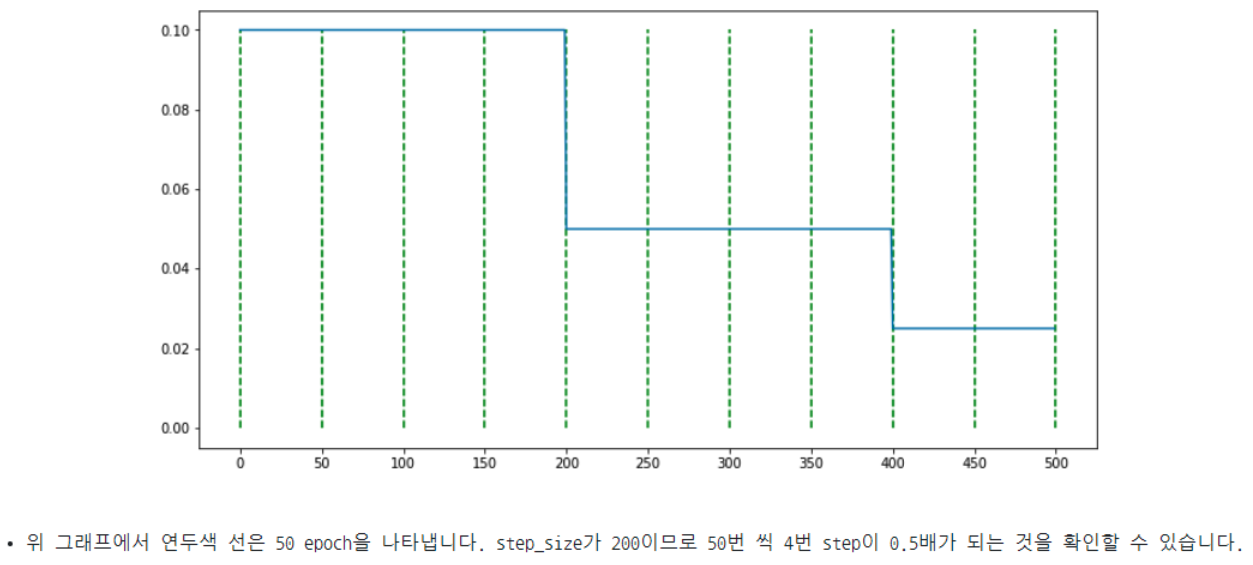

In [32]:
import copy
import time

criterion = nn.CrossEntropyLoss()
lr = 5.0  # 학습률(learning rate)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

In [33]:
def train(model: nn.Module) -> None:
    model.train()  # 학습 모드 시작
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i)
        seq_len = data.size(0)
        if seq_len != bptt:  # 마지막 배치에만 적용
            src_mask = src_mask[:seq_len, :seq_len]
        output = model(data, src_mask)
        loss = criterion(output.view(-1, ntokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(
                f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()

In [34]:
def evaluate(model: nn.Module, eval_data: Tensor) -> float:
    model.eval()  # 평가 모드 시작
    total_loss = 0.
    src_mask = generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

에포크 내에서 반복됩니다. 만약 검증 오차(validation loss)가 우리가 지금까지 관찰한 것 중 최적이라면 모델을 저장합니다.   
매 에포크 이후에 학습률을 조절합니다.

In [35]:
best_val_loss = float('inf')
epochs = 3
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(model)
    val_loss = evaluate(model, val_data)
    val_ppl = math.exp(val_loss)
    elapsed = time.time() - epoch_start_time
    print('-' * 89)
    print(
        f'| end of epoch {epoch:3d} | time: {elapsed:5.2f}s | '
        f'valid loss {val_loss:5.2f} | valid ppl {val_ppl:8.2f}')
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = copy.deepcopy(model)

    scheduler.step()

| epoch   1 |   200/ 2930 batches | lr 5.00 | ms/batch 42.90 | loss  8.97 | ppl  7865.68
| epoch   1 |   400/ 2930 batches | lr 5.00 | ms/batch 28.84 | loss  7.49 | ppl  1797.31
| epoch   1 |   600/ 2930 batches | lr 5.00 | ms/batch 28.90 | loss  6.96 | ppl  1051.10
| epoch   1 |   800/ 2930 batches | lr 5.00 | ms/batch 29.21 | loss  6.78 | ppl   876.96
| epoch   1 |  1000/ 2930 batches | lr 5.00 | ms/batch 29.09 | loss  6.56 | ppl   708.03
| epoch   1 |  1200/ 2930 batches | lr 5.00 | ms/batch 29.55 | loss  6.55 | ppl   700.24
| epoch   1 |  1400/ 2930 batches | lr 5.00 | ms/batch 29.64 | loss  6.54 | ppl   689.16
| epoch   1 |  1600/ 2930 batches | lr 5.00 | ms/batch 29.85 | loss  6.51 | ppl   674.78
| epoch   1 |  1800/ 2930 batches | lr 5.00 | ms/batch 30.01 | loss  6.37 | ppl   583.77
| epoch   1 |  2000/ 2930 batches | lr 5.00 | ms/batch 30.02 | loss  6.38 | ppl   591.28
| epoch   1 |  2200/ 2930 batches | lr 5.00 | ms/batch 30.19 | loss  6.24 | ppl   514.01
| epoch   1 |  2400/ 

# 5.평가 데이터셋으로 모델 평가

In [36]:
test_loss = evaluate(best_model, test_data)
test_ppl = math.exp(test_loss)
print('=' * 89)
print(
    f'| End of training | test loss {test_loss:5.2f} | '
    f'test ppl {test_ppl:8.2f}')
print('=' * 89)

| End of training | test loss  6.16 | test ppl   471.40
